In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz

In [ ]:
pip install graphviz  # decision tree 시각화해주는 라이브러리

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)

print(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

[[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.  5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.  3.5 1.3 0.3]
 [7.2 3.2 6.  1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.  1.9]]


DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [ ]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [ ]:
# .dot 파일로 export 해 줌
export_graphviz(dt, out_file='tree.dot', 
                class_names = iris.target_names, 
                feature_names=iris.feature_names, 
                impurity=True, # gini 출력
                filled =True) # class별 color 채우기

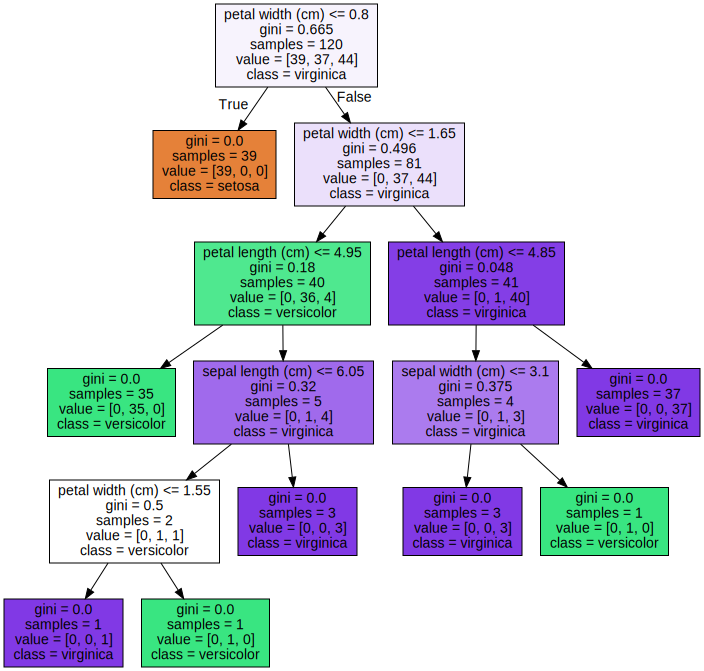

In [ ]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph) #dot_graph의 source저장

# **퀴즈 1**


*   어떤 Iris 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.7cm, 1.0cm일 때, Iris의 종을 예측해 보시오.



In [ ]:
X_value = np.array([5, 3, 1.7, 1.0]).reshape(1,-1)
# print(X_value.shape)

Y_pred = dt.predict(X_value)
print('X_value의 iris의 종류는', Y_pred, '입니다.')

X_value의 iris의 종류는 [1] 입니다.
